# load data

In [7]:
# import load_iris function from datasets module
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import random
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_csv("../../../accuracy_drop_proj/datasets/EEG_data_Epileptic_Seizure_Recognition.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data.shape



(11500, 179)

In [3]:
y = data.y.values

del data["y"] # remove rings from data, so we can convert all the dataframe to a numpy 2D array.
X = data.values.astype(np.float)

In [4]:
y.shape

(11500,)

In [5]:
#y = data['y']
# data = data.drop(['y'],axis=1)
# data.head()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.30,random_state=4)

In [7]:
print(x_test.shape)
print(x_train.shape)

(3450, 178)
(8050, 178)


In [8]:
#find the order of the feature according to information gain
model = ExtraTreesClassifier()
model.fit(data, y)


information_gain = {}
for i in range(len(model.feature_importances_)):
    information_gain.update({i: model.feature_importances_[i]})


In [9]:
information_gain

{0: 0.005073381108104727,
 1: 0.004641207608452361,
 2: 0.004409757918398264,
 3: 0.003951867530210572,
 4: 0.00452884637692777,
 5: 0.004827868156802329,
 6: 0.00800752665040871,
 7: 0.00509620748988935,
 8: 0.004850959792600359,
 9: 0.004436249820192257,
 10: 0.004977964358864892,
 11: 0.005046833224483586,
 12: 0.004614454290808314,
 13: 0.008863377695298044,
 14: 0.004781141105916478,
 15: 0.004913868352759549,
 16: 0.005581634549107967,
 17: 0.004810836978222792,
 18: 0.005903926866380381,
 19: 0.004887980994349723,
 20: 0.00457455044897729,
 21: 0.005759085981380913,
 22: 0.008266585979375903,
 23: 0.005108234356707523,
 24: 0.00494853476774224,
 25: 0.004263731615138571,
 26: 0.004892793893135452,
 27: 0.0049239703568061495,
 28: 0.007910329612208377,
 29: 0.005050644712918826,
 30: 0.005202313789241869,
 31: 0.0070819506693103095,
 32: 0.0059647370952952755,
 33: 0.007703146208434096,
 34: 0.003920931070016262,
 35: 0.007738525456939055,
 36: 0.008584820512823828,
 37: 0.004225

In [10]:
col_sorted=sorted(information_gain.items(), key=lambda x:x[1],reverse=True)
select_col=[]
for i in col_sorted:
    select_col.append(i[0])

In [11]:
print(select_col)

[57, 110, 67, 95, 148, 94, 74, 13, 166, 105, 36, 66, 22, 170, 103, 97, 108, 6, 159, 127, 28, 111, 35, 60, 33, 109, 124, 62, 31, 76, 104, 115, 44, 116, 42, 154, 165, 98, 119, 117, 52, 139, 45, 120, 58, 83, 102, 129, 32, 114, 18, 39, 90, 65, 21, 112, 51, 79, 99, 175, 153, 16, 68, 89, 70, 73, 121, 82, 168, 163, 85, 160, 41, 91, 101, 177, 54, 30, 61, 174, 155, 86, 53, 56, 169, 84, 171, 75, 59, 118, 78, 23, 87, 7, 0, 126, 136, 29, 11, 157, 142, 69, 146, 10, 24, 106, 27, 49, 15, 50, 113, 150, 26, 19, 77, 100, 88, 176, 8, 135, 5, 143, 81, 72, 17, 96, 162, 14, 172, 137, 80, 107, 132, 167, 93, 123, 46, 173, 1, 63, 144, 12, 122, 128, 55, 20, 152, 130, 4, 47, 131, 48, 38, 9, 2, 158, 138, 149, 125, 64, 133, 151, 40, 25, 140, 37, 145, 92, 147, 164, 161, 156, 43, 71, 3, 134, 34, 141]


In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(model, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(data, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    8.6s finished

[2018-12-18 10:38:33] Features: 1/4 -- score: 0.3991304347826087[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 177 out of 177 | elapsed:   16.9s finished

[2018-12-18 10:38:50] Features: 2/4 -- score: 0.936[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   17.7s finished

[2018-12-18 10:39:08] Features: 3/4 -- score: 0.9999130434782608[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   21.2s finished

[2018-12-18 10:39:29] Features: 4/4 -- score: 1.0

In [17]:
sfs1.k_feature_idx_

(0, 14, 96, 171)

In [ ]:
temp = data.iloc[:,[9, 52, 168, 33, 157, 107, 159, 1, 54, 166,178]]

In [ ]:
temp.head()

In [ ]:
y = temp.y.values

del temp["y"] # remove rings from data, so we can convert all the dataframe to a numpy 2D array.
X = temp.values.astype(np.float)

In [ ]:
y = temp['y']
temp = temp.drop(['y'],axis=1)
temp.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=4)

In [ ]:
from sklearn import svm

model_svm= svm.SVC(probability=True)
model_svm.fit(x_train, y_train)


y_predsvm = model_svm.predict(x_test)
print('Accuracy of svm classifier on train set: {:.2f}'.format(accuracy_score(y_test,y_predsvm)))


In [ ]:
from sklearn import tree
model1=tree.DecisionTreeClassifier()
print("train tree")


model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print('Accuracy of tree classifier on train set: {:.2f}'.format(accuracy_score(y_test,y_pred1)))

In [ ]:
model_svm.predict([[-14,-61,-29,-1,44,18,-45,-14,1,16]])

In [ ]:
import heapq
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from accuracy_drop_proj.strategies.change_combination.change_combination import Change_Combination

"""
this method according the user request find the difference of the probability for each class and then sort the rows according to them.
for example if we have [0.1  0.6  0.3] and request of user be [0,1] we compute 0.5 for this row and sort the row Ascending
"""

class Change_ProbabilityDistance_RankFeature(object):
    def __init__(self):
        pass

    def change(self,x_train, y_train, percetage, mnb, change_plan):
        number_change_requested = int(percetage / 100 * x_train.shape[0])
        print("{} percentage error is equal to {} change \n".format(percetage, number_change_requested))


        used_row ={}
        occurred_change = 0
        all_changed = 1
        change_done = False
        x_train_changed = np.copy(x_train)

        #---------------------find the order of the feature according to information gain-----------------------

        model = ExtraTreesClassifier()
        model.fit(x_train, y_train)

        print("combination of feature")

        information_gain = {}
        for i in range(len(model.feature_importances_)):
            information_gain.update({i: model.feature_importances_[i]})

        ranked_information_dic = {}
        sum_gain = 0
        for L in range(0,x_train.shape[1] + 1):
            for subset in Change_Combination.combinations_index(self,information_gain.keys(), L):
                if not subset:
                    pass
                else:

                    for key in subset:
                        sum_gain = sum_gain + information_gain.get(key)
                    ranked_information_dic.update({tuple(subset): sum_gain})
                    sum_gain = 0

        print("create all subset")

        all_subset = sorted(ranked_information_dic.items(), key=lambda item: len(item[0]) * 1000 - item[1], reverse=False)




        probability = mnb.predict_proba(x_train)
        probability_distance={}

        #----------------------------------------------changing--------------------------------------------------

        for i in range(len(change_plan["key"])):
            occurred_change = 0

            indices = [t for t, x in enumerate(y_train) if x == change_plan["key"][i][0]]
            # print(indices)
            print("{} rows have target {} \n".format(len(indices), change_plan["key"][i][0]))

            probability_distance.clear()
            probability_distance_sorted=[]

            # find the distance probability between the class that user need to change

            for elements in indices:
                probability_distance.update({elements:np.abs(probability[elements][change_plan["key"][i][0]]- probability[elements][change_plan["key"][i][1]])})
            # ---------------------------finding the order of the row according to probability distance-------------------------
            # sort the row according the distance probability

            probability_distance_sorted = sorted(probability_distance.items(), key=lambda x: x[1], reverse=False)
            indices=[]
            for j in probability_distance_sorted:
                indices.append(j[0])

            print(indices)

            print("try in indices")
            for p in range(len(indices)):

                if (all_changed == number_change_requested + 1):
                    print("your requests have been done :)")
                    break
                    
               
            
#                 print(mnb.predict([x_train[indices[p]]]))
                if y_train[indices[p]] == mnb.predict([x_train[indices[p]]]) and indices[p] not in used_row:

                    change_done = False
                    
                    for subset in all_subset:
                        if change_done:
                            break
                        else:

                            if (occurred_change == change_plan["number"][i]):
                                #                         print("part of your request has been done :))))")
                                break

                            print("try to change, with changing index {} on row {}".format(list(subset[0]),indices[p]))

                            #######################################################
                            # impose Outlier insted of 0

                           ########################################################
                            x_train_changed[indices[p]][list(subset[0])] = 0

                            if (change_plan["key"][i][1] == mnb.predict([x_train_changed[indices[p]]])[0]):

                                print(x_train[indices[p]], mnb.predict([x_train[indices[p]]])[0])
                                print(x_train_changed[indices[p]],
                                      mnb.predict([x_train_changed[indices[p]]])[0])
                                print(" \n change number {} \n".format(all_changed))

                                used_row.update({indices[p]: indices[p]})
                                occurred_change = occurred_change + 1
                                change_done = True
                                all_changed = all_changed + 1
                                break

                            else:
                                x_train_changed[indices[p]] = np.copy(x_train[indices[p]])

        if (all_changed <= number_change_requested):
            print("your request doesn't complete! please change your plan")
        return np.copy(x_train_changed)


In [ ]:
change_plan={"key":[[4,2]],"number":[1]}

In [ ]:
confus

In [ ]:
classmodel = Change_ProbabilityDistance_RankFeature()
classmodel.change(x_test, y_test,10,model_svm, change_plan)

In [18]:
import heapq
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from accuracy_drop_proj.strategies.change_combination.change_combination import Change_Combination

"""
this  method first sort the rows according to uncetainity and features according to information gain and then pick
first rows that classifer is not sure about them and feature are more likely to change 
"""
class Change_Uncertainty_Rankfeatures(object):
    def __init__(self):
        pass

    def change(self,x_train, y_train, percetage, mnb, change_plan):
        number_change_requested = int(percetage / 100 * x_train.shape[0])
        print("{} percentage error is equal to {} change \n".format(percetage, number_change_requested))

        used_row ={}
        occurred_change = 0
        all_changed = 1
        change_done = False
        x_train_changed = np.copy(x_train)

        #---------------------find the order of the feature according to information gain-----------------------

        model = ExtraTreesClassifier()
        model.fit(x_train, y_train)

        print("combinatio of feature")

        information_gain = {}
        for i in range(len(model.feature_importances_)):
            information_gain.update({i: model.feature_importances_[i]})

        ranked_information_dic = {}
        sum_gain = 0
        for L in range(0,x_train.shape[1] + 1):
            for subset in Change_Combination.combinations_index(self,information_gain.keys(), L):
                if not subset:
                    pass
                else:

                    for key in subset:
                        sum_gain = sum_gain + information_gain.get(key)
                    ranked_information_dic.update({tuple(subset): sum_gain})
                    sum_gain = 0

        print("create all subset")

        all_subset = sorted(ranked_information_dic.items(), key=lambda item: len(item[0]) * 1000 - item[1], reverse=False)


        #---------------------------finding the order of the row according to uncertainity-------------------------

        probability = mnb.predict_proba(x_train)

        print("finding uncertainity")

        uncertainty={}
        for index,roww in enumerate(probability):
            largest_val =heapq.nlargest(2, roww)
            uncertainty.update({index:1-(np.abs(np.subtract(largest_val[0],largest_val[1])))})
            largest_val=[]
            # print(index,row,np.subtract(largest_val[0],largest_val[1]))

        print(len(probability))
        print(len(uncertainty))
        #sort the uncertainty
        uncertainty_sorted=sorted(uncertainty.items(), key=lambda x:x[1],reverse=True)


        print("changing")
        #---------------------------------------------changing--------------------------------------------

        for i in range(len(change_plan["key"])):
            occurred_change = 0
            #sort the row according to uncertainty

            indices=[]

            for key_dic in uncertainty_sorted:
                if y_train[key_dic[0]] == change_plan["key"][i][0]:
                    indices.append(key_dic[0])

            print(indices)


            #this is normal indices
            # indices_2 = [t for t, x in enumerate(y_train) if x == change_plan["key"][i][0]]


            print("{} rows have target {} \n".format(len(indices), change_plan["key"][i][0]))

            for p in range(len(indices)):
                print("try in indices")
                if (all_changed == number_change_requested + 1):
                    print("your requests have been done :)")
                    break
                if y_train[indices[p]] == mnb.predict([x_train[indices[p]]]) and indices[p] not in used_row:

                    change_done = False
                    for subset in all_subset:
                        if change_done:
                            break
                        else:

                            if (occurred_change == change_plan["number"][i]):
                                #                         print("part of your request has been done :))))")
                                break

                            print("try to change, with change index {} on row {}".format(list(subset[0]),indices[p]))
                            x_train_changed[indices[p]][list(subset[0])] = 0

                            if (change_plan["key"][i][1] == mnb.predict([x_train_changed[indices[p]]])[0]):

                                print(x_train[indices[p]], mnb.predict([x_train[indices[p]]])[0])
                                print(x_train_changed[indices[p]],
                                      mnb.predict([x_train_changed[indices[p]]])[0])
                                print(" \n change number {} \n".format(all_changed))

                                used_row.update({indices[p]: indices[p]})
                                occurred_change = occurred_change + 1
                                change_done = True
                                all_changed = all_changed + 1
                                break

                            else:
                                x_train_changed[indices[p]] = np.copy(x_train[indices[p]])

        if (all_changed <= number_change_requested):
            print("your request doesn't complete! please change your plan")
        return np.copy(x_train_changed)


ModuleNotFoundError: No module named 'accuracy_drop_proj'

In [ ]:
model2= Change_Uncertainty_Rankfeatures()
model2.change(x_test, y_test,10,model1, change_plan)

# plotting
- increase number of the rows

In [19]:
alg1=[0.356,0.424,1.069,1.121,2.764,2.861,4.963,3.568,4.540,4.029,3.993]
alg2=[0.115,0.242,0.848,0.763,2.166,2.387,2.986,2.668,3.887,2.758,2.970]
alg3=[0.224,0.211,1.099,0.637,1.747,3.280,2.866,3.429,3.541,2.662,2.983]
alg4=[0.208,0.202,0.980,0.701,2.444,2.343,3.070,2.864,3.794,2.773,4.555]

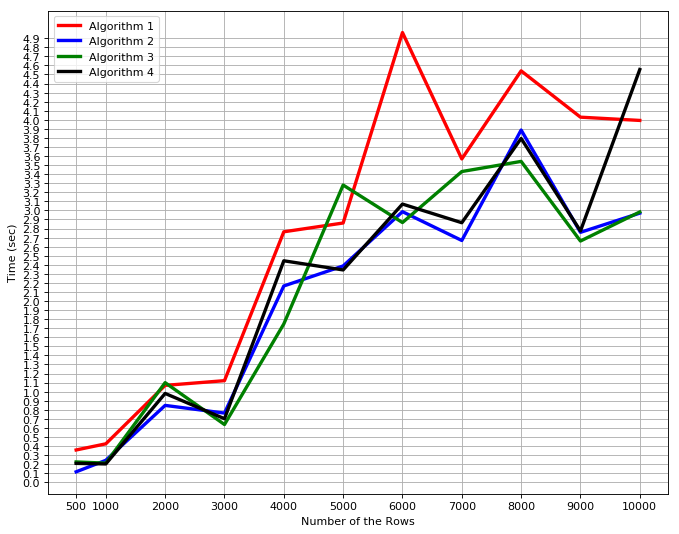

In [63]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.grid(True)
x=[500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
plt.yticks(np.arange(0, 5, 0.1))
plt.xticks(x)

plt.plot(x,alg1,c='red',linewidth=3,label= 'Algorithm 1')
plt.plot(x,alg2,c= 'blue',linewidth=3,label= 'Algorithm 2')
plt.plot(x,alg3,c='green',linewidth=3,label= 'Algorithm 3')
plt.plot(x,alg4,c= 'black',linewidth=3,label= 'Algorithm 4')
plt.xlabel('Number of the Rows')
plt.ylabel('Time (sec)')
plt.legend()


# plotting
- increase number of column(Features)

In [14]:
alg1_col =[0.356,17.164,7200,7200,7200,7200,7200,7200,7200,7200]
alg2_col =[0.115,25.774,7200,7200,7200,7200,7200,7200,7200,7200]
alg3_col =[0.224,6.793,7200,7200,7200,7200,7200,7200,7200,7200]
alg4_col =[0.208,7.418,7200,7200,7200,7200,7200,7200,7200,7200]

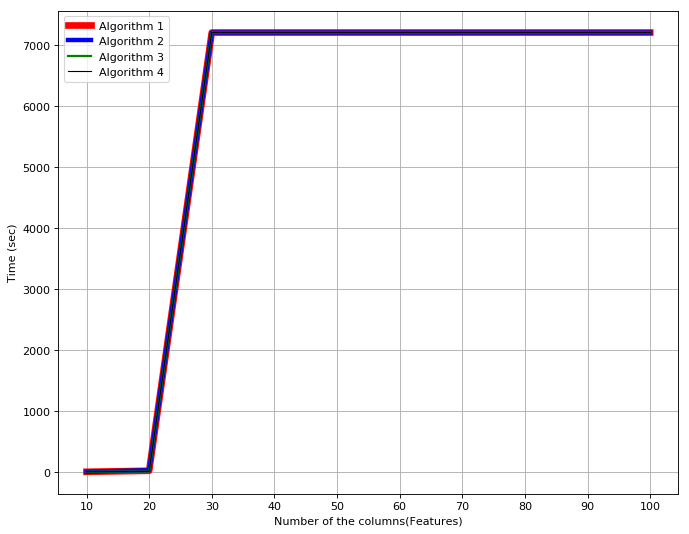

In [15]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.grid(True)
x=[10,20,30,40,50,60,70,80,90,100] 
#plt.yticks(np.arange(0, 5, 0.1))
plt.xticks(x)

plt.plot(x,alg1_col,c='red',linewidth=6,label= 'Algorithm 1')
plt.plot(x,alg2_col,c= 'blue',linewidth=4,label= 'Algorithm 2')
plt.plot(x,alg3_col,c='green',linewidth=2,label= 'Algorithm 3')
plt.plot(x,alg4_col,c= 'black',linewidth=1,label= 'Algorithm 4')
plt.xlabel('Number of the columns(Features)')
plt.ylabel('Time (sec)')
plt.legend()

# plotting
- prunning columns

In [29]:
alg1_col_prunning =[0.373,2.437,143.573,269.429,3028.437,3028.437]
alg2_col_prunning =[0.217,0.742,2.029,3.315,5.455,4.870]
alg3_col_prunning =[0.189,3.051,30.391,62.347,254.160,609.44]
alg4_col_prunning =[0.192,1.910,10.427,29.151,261.219,281.683]

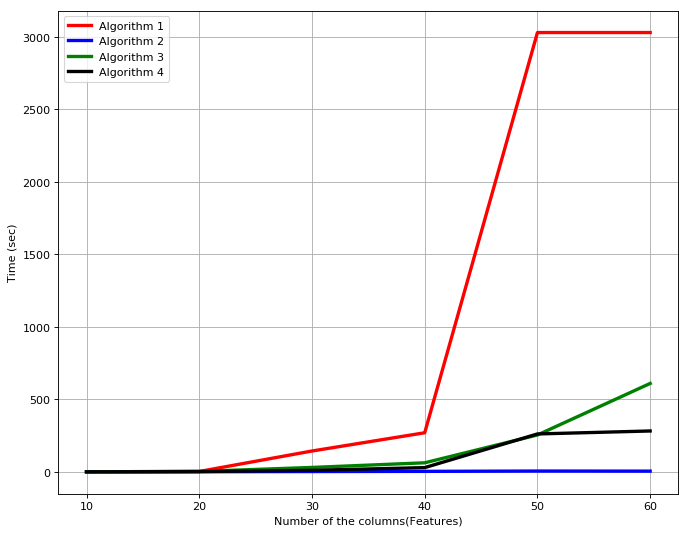

In [30]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.grid(True)
x=[10,20,30,40,50,60] 
#plt.yticks(np.arange(0, 5, 0.1))
plt.xticks(x)

plt.plot(x,alg1_col_prunning,c='red',linewidth=3,label= 'Algorithm 1')
plt.plot(x,alg2_col_prunning,c= 'blue',linewidth=3,label= 'Algorithm 2')
plt.plot(x,alg3_col_prunning,c='green',linewidth=3,label= 'Algorithm 3')
plt.plot(x,alg4_col_prunning,c= 'black',linewidth=3,label= 'Algorithm 4')
plt.xlabel('Number of the columns(Features)')
plt.ylabel('Time (sec)')
plt.legend()

# after fix bugs

In [ ]:
alg1_col_increase =[0.192,0.235,]
alg2_col_increase =[0.070,0.083,]
alg3_col_increase =[0.043,4.350,]
alg4_col_increase =[0.042,4.367]